In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from datetime import datetime
# matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import gc
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, output_notebook, show

In [4]:
#@title 사용할 데이터셋 및 모델 선택, 경로 설정
#@markdown /MyDrive/ [ **any directory you use** ]
Directory = "dacon_제주도도로교통량" #@param {type:"string"}

tr = "train.csv" #@param {type:"string"}
te = "test.csv" #@param {type:"string"}
sa = "sample_submission.csv" #@param {type:"string"}

# Programmer_Name = "Choi" #@param {type : "string"}
# Model_Name = "gridsearch"#@param{type: "string"}
curr_dir = '/content/drive/MyDrive/Dacon/' + Directory  #수산Biz
data_dir_ = curr_dir  + '/data/' #데이터폴더

#데이터 그 자체임
tr_dir = data_dir_ + tr
te_dir = data_dir_ + te
sa_dir = data_dir_ + sa
info = data_dir_ + 'data_info.csv'

#curr_dir: 작업위치경로, data_dir_: 작업위치 내 데이터 경로 
print("현재 경로:", curr_dir)

현재 경로: /content/drive/MyDrive/Dacon/dacon_제주도도로교통량


In [5]:
# def csv_to_parquet(csv_path, save_name):
#     df = pd.read_csv(data_dir_ + csv_path)
#     df.to_parquet(data_dir_ + f'{save_name}.parquet')
#     del df
#     gc.collect()
#     print(save_name, 'Done.')

In [6]:
# csv_to_parquet('train.csv', 'train')
# csv_to_parquet('test.csv', 'test')

In [7]:
train = pd.read_parquet(data_dir_ + 'train.parquet')
test = pd.read_parquet(data_dir_ + 'test.parquet')

In [8]:
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']

In [9]:
train.drop(['road_in_use'],axis=1,inplace=True)
test.drop(['road_in_use'],axis=1,inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [11]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [12]:
da_info = pd.read_csv(info)

In [13]:
da_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


# 함수

In [14]:
def boxplot(feature):
  plt.figure(figsize=(8,12))
  sns.boxplot(x=train[feature].to_numpy(),y=train['target'].to_numpy())
  plt.show()

In [15]:
def barplot(feature,estimators = np.mean):
  plt.figure(figsize=(8,12))
  sns.barplot(x=train[feature].to_numpy(),y=train['target'].to_numpy(),estimator=estimators)
  plt.show()

# EDA

## day_of_week (요일)

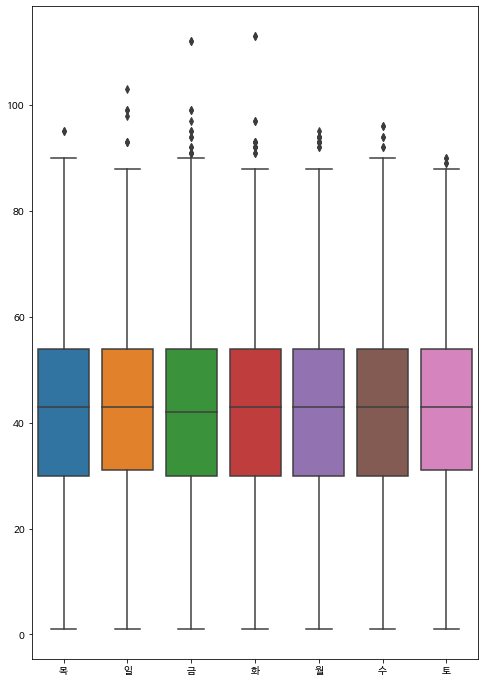

In [ ]:
boxplot('day_of_week')

In [ ]:
train[['day_of_week','target']].groupby('day_of_week').mean()

,target
day_of_week,
금,42.450328
목,42.768345
수,42.770372
월,42.761365
일,43.179300
토,42.894117
화,42.699198


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '평균 속도 분포')

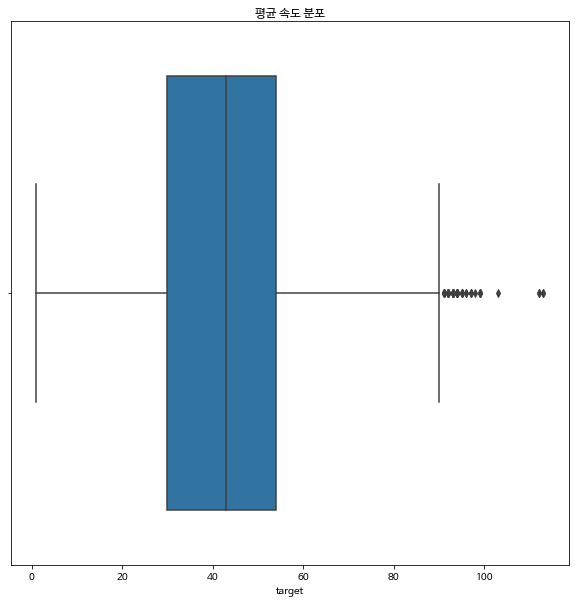

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(train['target'])
plt.title('평균 속도 분포')

- 요일자체는 평균 속도에 큰 영향을 주진 않는 것으로 보임
- 하지만, 전혀 영향이 없진 않을 듯
- 특정 요일에는 A시간대, 다른 요일에는 B시간대에 영향이 있지않을까...?

In [ ]:
# from bokeh.plotting import figure
# from bokeh.io import show, output_notebook
# import numpy as np

# p = figure(plot_width = 400,plot_height=300,
#           title= ' ' ,
#           x_axis_label = ' ', y_axis_label = ' ')
# p.vbar(train['day_of_week'].to_numpy(),
#        width = 1,
#        bottom= 0,
#        top = train['target'].to_numpy(),
#        color = 'blue')

# output_notebook()
# show(p)

## base_hour (시간대)

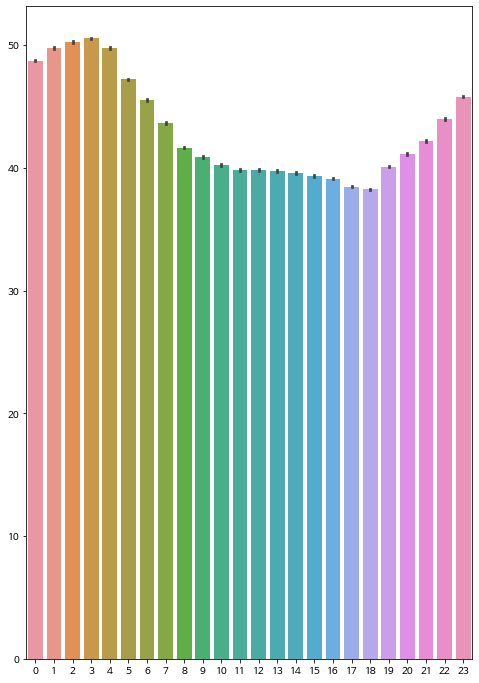

In [ ]:
barplot('base_hour')

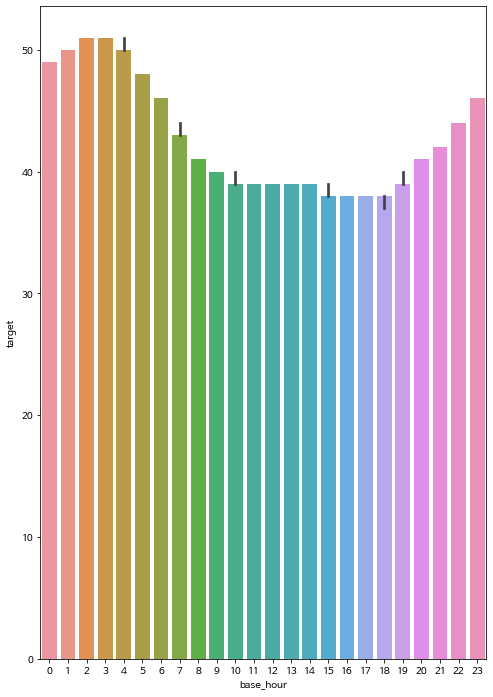

In [ ]:
barplot('base_hour',np.median)

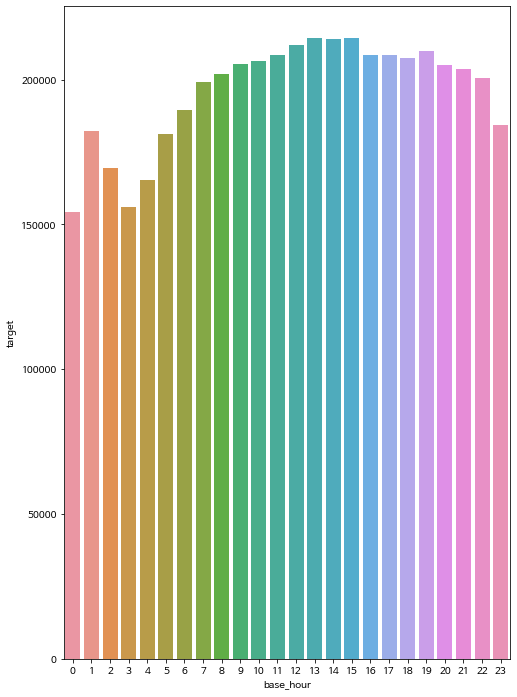

In [ ]:
barplot('base_hour',len)

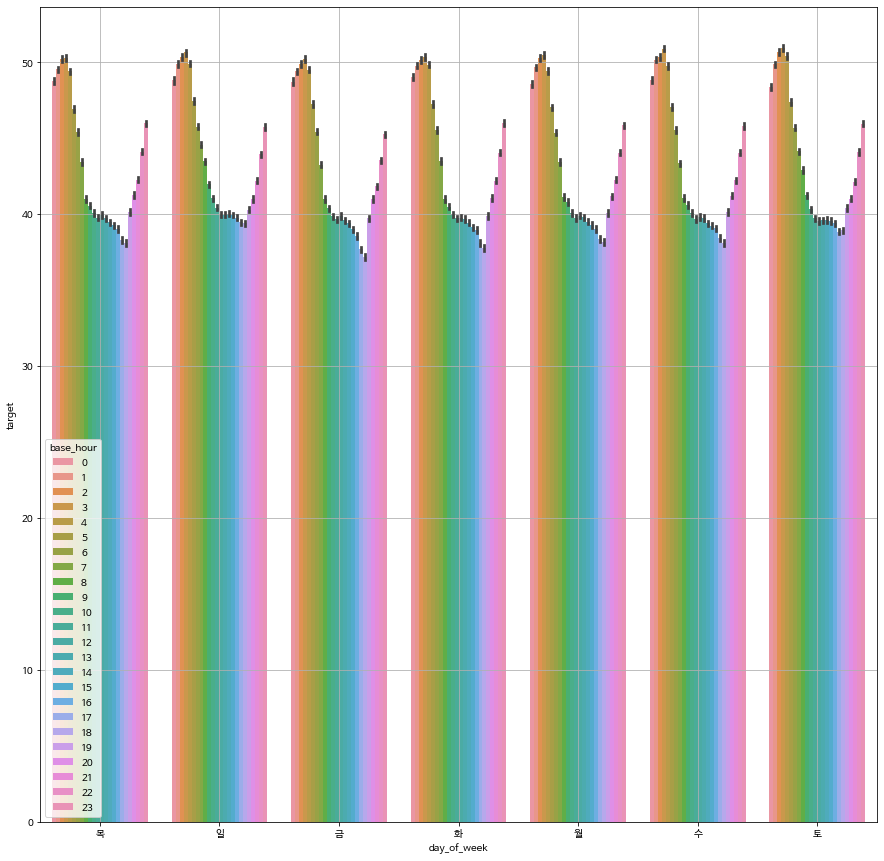

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x='day_of_week',y='target',data = train, hue='base_hour')
plt.grid()
plt.show()

- 8 ~ 16를 활동시간이라고 봤을 때, 토일은 차량 속도가 비슷하지만 평일은 퇴근시간에 확 떨어지고 그 중에 금요일에는 떨어지는 폭이 더 큼
- 새벽 기준으로 주말에는 속도가 빠르지만 평일은 비교적 느림
---
-----> 평일 주말이나 월화수목, 금, 주말로 구분하는 변수 생성해도 될 듯



## lane_count (차로수)

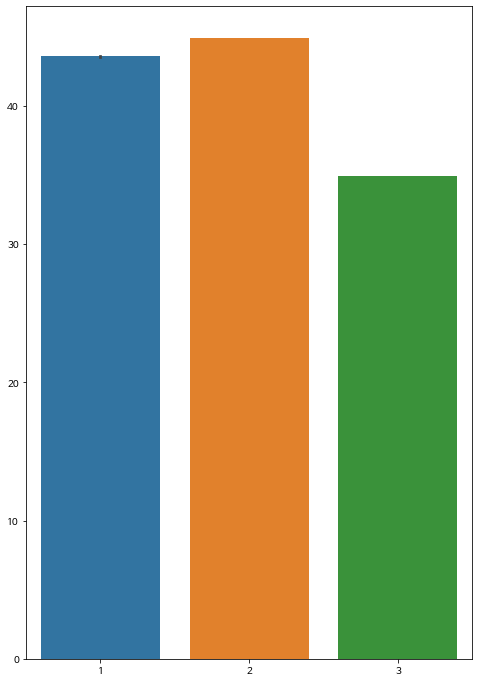

In [ ]:
barplot('lane_count')

- 차로수가 클수록 고속도로에 가까울테고 그러면 평균속도도 올라가지 않을까 했지만 2 1 3 순으로 차량속도가 빠름..
- 오히려 3차로 쪽으로 차량이 몰려서 평균 속도가 낮게 나오는 듯..

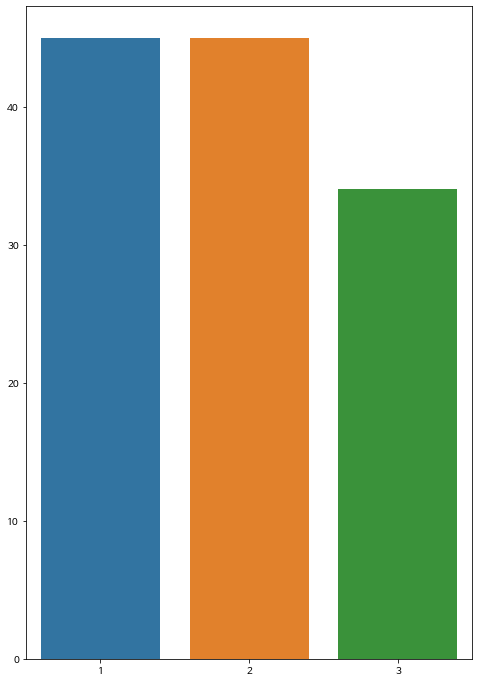

In [ ]:
barplot('lane_count',np.median)

## road_rating (도로등급)

## multi_linked (중용구간 여부)

## connect_code (연결로 코드)

## maximum_speed_limit (최고속도제한)

## weight_restricted (통과제한하중)

## hight_restricted (통과제한높이)

## road_type (도로유형)

## start_turn_restricted (시작 지점의 회전제한 유무)

## end_turn_restricted (도착지점의 회전제한 유무)

## road_name (도로명)

## start_node_name (시작지점명)

In [ ]:
## 같은 링크별로 데이터 2개 존재(A->B, B->A)

## end_node_name (도착지점명)

## vehicle_restricted (통과제한차량)

In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,0,1,106,지방도1112호선,0,0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,0,2,103,일반국도11호선,0,0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,0,2,103,일반국도16호선,0,0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,0,2,107,태평로,0,0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,0,2,103,일반국도12호선,0,0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [ ]:
## 파생변수 토일 제외하고 크리스마스/ 설날 이런날 체크


In [ ]:
train[['maximum_speed_limit','target']].groupby('maximum_speed_limit').median()

,target
maximum_speed_limit,
30.0,33.0
40.0,65.0
50.0,34.0
60.0,44.0
70.0,43.0
80.0,62.0


In [ ]:
train[['maximum_speed_limit','target']].groupby('maximum_speed_limit').count()

,target
maximum_speed_limit,
30.0,229761
40.0,6790
50.0,1103682
60.0,1665573
70.0,995077
80.0,700334


In [ ]:
print('도로이름 누락된 데이터 비율: ',train.loc[train['road_name'] == '-'].shape[0]/ train.shape[0])

도로이름 누락된 데이터 비율:  0.1211309752347105


In [ ]:
set(train['road_name'].to_list())

{'-',
 '경찰로',
 '고평교',
 '관광단지1로',
 '관광단지2로',
 '관광단지로',
 '관덕로',
 '권학로',
 '남조로',
 '동문로',
 '동부관광도로',
 '동홍로',
 '번영로',
 '산서로',
 '삼무로',
 '삼봉로',
 '삼성로',
 '새서귀로',
 '서사로',
 '수영장길',
 '시민광장로',
 '시청로',
 '신광로',
 '신대로',
 '신산로',
 '아봉로',
 '애원로',
 '애조로',
 '어시천교',
 '연동로',
 '연북2교',
 '연북로',
 '연삼로',
 '외도천교',
 '일반국도11호선',
 '일반국도12호선',
 '일반국도16호선',
 '일반국도95호선',
 '일반국도99호선',
 '일주동로',
 '임항로',
 '제2거로교',
 '중문로',
 '중산간서로',
 '중앙로',
 '중정로',
 '지방도1112호선',
 '지방도1115호선',
 '지방도1116호선',
 '지방도1117호선',
 '지방도1118호선',
 '지방도1119호선',
 '지방도1120호선',
 '지방도1132호선',
 '지방도1136호선',
 '지방도97호선',
 '첨단로',
 '태평로',
 '한천로',
 '호근로',
 '호서중앙로'}